<p style="background-color:mediumseagreen;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>Computer Vision - YOLOv8</b></p>

In [3]:
#pip install ultralytics   

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# <font color='mediumseagreen'> <b>Cats</b><font color='black'>  

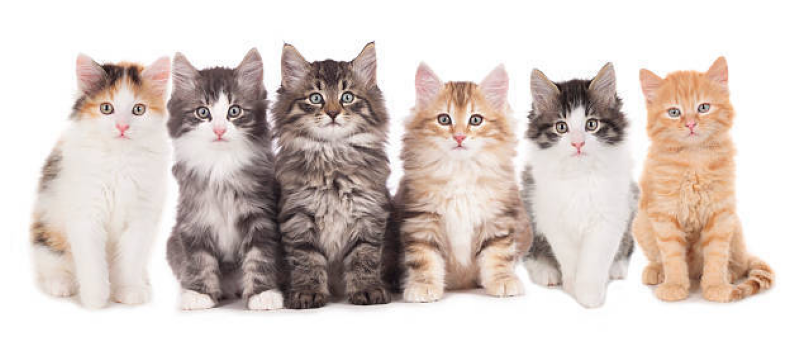

In [7]:
img= cv2.imread("cats.jpg")
img1=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(img1)
plt.show()

**NOTE:** This pre-trained model should be included in the same folder "yolov8n.pt"

In [9]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\refia\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.



0: 288x640 6 cats, 153.0ms
Speed: 14.9ms preprocess, 153.0ms inference, 3.3ms postprocess per image at shape (1, 3, 288, 640)


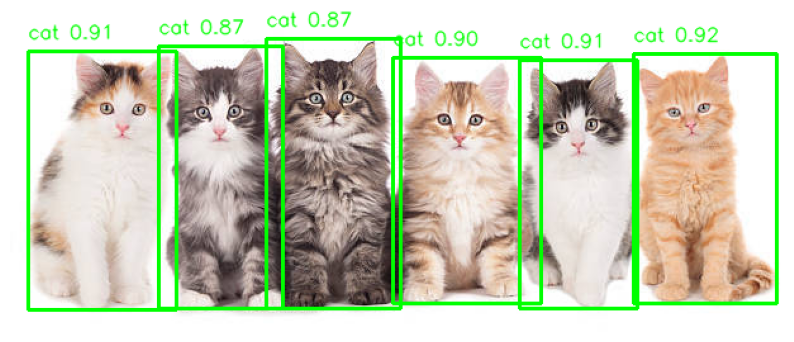

In [11]:
# Load the YOLOv8 model
model = YOLO("yolov8n.pt")

# Load the image
img = cv2.imread("cats.jpg")

# Perform object detection
results = model(img)

# Results is a list of results objects
result = results[0]

# Extract the bounding boxes, labels, and confidences
boxes = result.boxes.xyxy.cpu().numpy()  # Bounding boxes in [x1, y1, x2, y2] format
class_indices = result.boxes.cls.cpu().numpy().astype(int)  # Class indices
confidences = result.boxes.conf.cpu().numpy()  # Confidence scores
labels = result.names  # Object labels

# Count the occurrences of each object label
object_counts = Counter([labels[class_index] for class_index in class_indices])

# Draw bounding boxes
output = img.copy()
for box, class_index, confidence in zip(boxes, class_indices, confidences):
    x1, y1, x2, y2 = map(int, box)
    label = labels[class_index]
    cv2.rectangle(output, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(output, f'{label} {confidence:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

# Convert BGR to RGB for displaying with Matplotlib
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(output_rgb)
plt.show()

In [6]:
# Print the number of objects detected
print("Number of objects in this image are: " + str(len(boxes)))

# Print details of detected objects
print("\nDetails of detected objects:")
for i, (box, class_index, confidence) in enumerate(zip(boxes, class_indices, confidences)):
    label = labels[class_index]
    print(f"Object {i+1}: Label = {label}, Confidence = {confidence:.2f}")

# Block to print counts of each detected object
print("\nObject Counts:")
for object_label, count in object_counts.items():
    print(f"{object_label}: {count}")

Number of objects in this image are: 6

Details of detected objects:
Object 1: Label = cat, Confidence = 0.92
Object 2: Label = cat, Confidence = 0.91
Object 3: Label = cat, Confidence = 0.91
Object 4: Label = cat, Confidence = 0.90
Object 5: Label = cat, Confidence = 0.88
Object 6: Label = cat, Confidence = 0.88

Object Counts:
cat: 6


In [7]:
labels       # Let's see what objects are in the labels.

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

# <font color='mediumseagreen'> <b>Cars</b><font color='black'>  

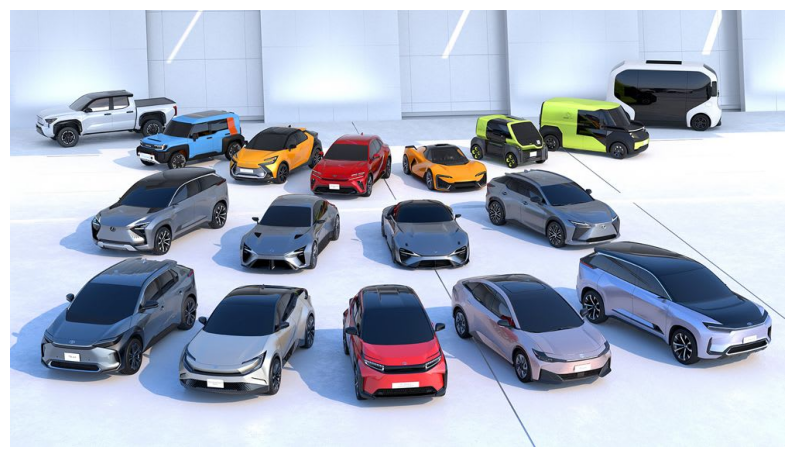

In [8]:
imge= cv2.imread("cars.jpg")
imge1=cv2.cvtColor(imge, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(imge1)
plt.show()


0: 384x640 16 cars, 4 trucks, 90.0ms
Speed: 3.8ms preprocess, 90.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


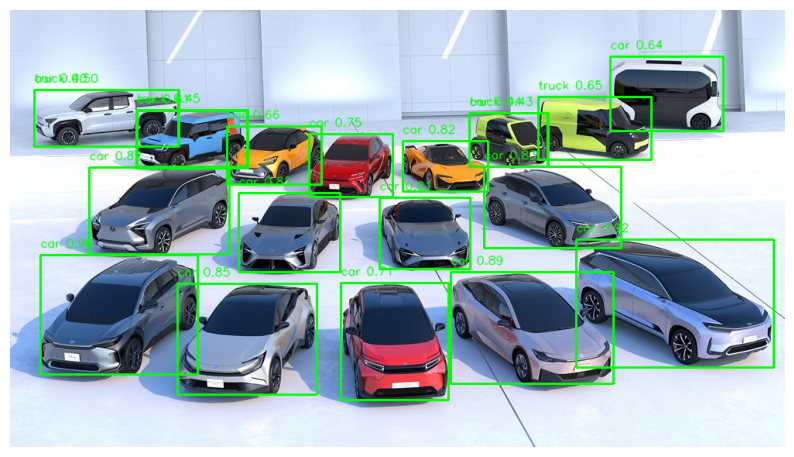

In [9]:
# Perform object detection
results = model(imge)

# Results is a list of results objects
result = results[0]

# Extract the bounding boxes, labels, and confidences
boxes = result.boxes.xyxy.cpu().numpy()  # Bounding boxes in [x1, y1, x2, y2] format
class_indices = result.boxes.cls.cpu().numpy().astype(int)  # Class indices
confidences = result.boxes.conf.cpu().numpy()  # Confidence scores
labels = result.names  # Object labels

# Count the occurrences of each object label
object_counts = Counter([labels[class_index] for class_index in class_indices])

# Draw bounding boxes
output = imge.copy()
for box, class_index, confidence in zip(boxes, class_indices, confidences):
    x1, y1, x2, y2 = map(int, box)
    label = labels[class_index]
    cv2.rectangle(output, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(output, f'{label} {confidence:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

# Convert BGR to RGB for displaying with Matplotlib
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(output_rgb)
plt.show()

In [10]:
# Print the number of objects detected
print("Number of objects in this image are: " + str(len(boxes)))

# Print details of detected objects
print("\nDetails of detected objects:")
for i, (box, class_index, confidence) in enumerate(zip(boxes, class_indices, confidences)):
    label = labels[class_index]
    print(f"Object {i+1}: Label = {label}, Confidence = {confidence:.2f}")

# Block to print counts of each detected object
print("\nObject Counts:")
for object_label, count in object_counts.items():
    print(f"{object_label}: {count}")

Number of objects in this image are: 20

Details of detected objects:
Object 1: Label = car, Confidence = 0.92
Object 2: Label = car, Confidence = 0.90
Object 3: Label = car, Confidence = 0.89
Object 4: Label = car, Confidence = 0.85
Object 5: Label = car, Confidence = 0.83
Object 6: Label = car, Confidence = 0.82
Object 7: Label = car, Confidence = 0.82
Object 8: Label = car, Confidence = 0.82
Object 9: Label = car, Confidence = 0.81
Object 10: Label = car, Confidence = 0.75
Object 11: Label = car, Confidence = 0.71
Object 12: Label = car, Confidence = 0.66
Object 13: Label = truck, Confidence = 0.65
Object 14: Label = car, Confidence = 0.64
Object 15: Label = car, Confidence = 0.61
Object 16: Label = truck, Confidence = 0.50
Object 17: Label = truck, Confidence = 0.45
Object 18: Label = car, Confidence = 0.44
Object 19: Label = truck, Confidence = 0.43
Object 20: Label = car, Confidence = 0.40

Object Counts:
car: 16
truck: 4


# <font color='mediumseagreen'> <b>Trees</b><font color='black'>  

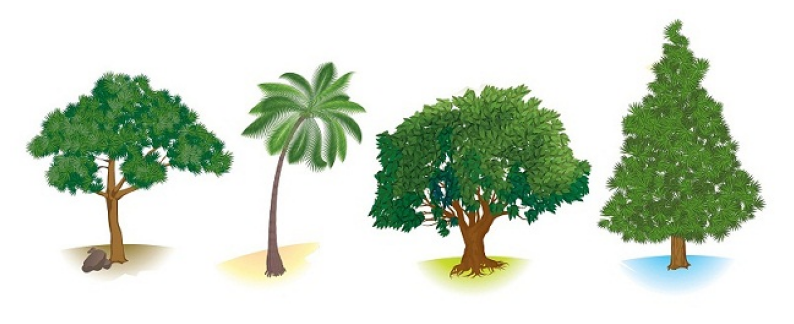

In [11]:
im= cv2.imread("trees.jpg")
im1=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(im1)
plt.show()


0: 256x640 2 potted plants, 1 vase, 91.2ms
Speed: 1.6ms preprocess, 91.2ms inference, 4.0ms postprocess per image at shape (1, 3, 256, 640)


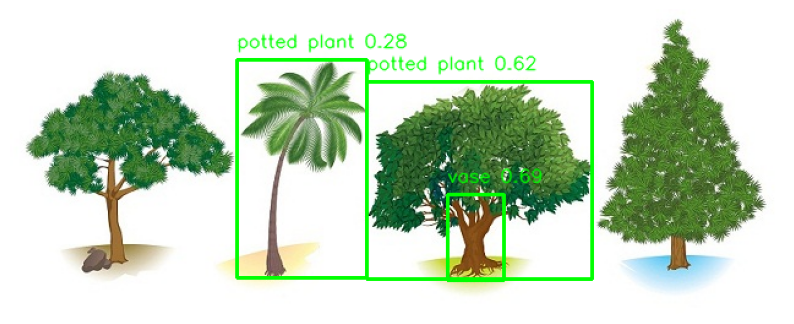

In [12]:
# Perform object detection
results = model(im)

# Results is a list of results objects
result = results[0]

# Extract the bounding boxes, labels, and confidences
boxes = result.boxes.xyxy.cpu().numpy()  # Bounding boxes in [x1, y1, x2, y2] format
class_indices = result.boxes.cls.cpu().numpy().astype(int)  # Class indices
confidences = result.boxes.conf.cpu().numpy()  # Confidence scores
labels = result.names  # Object labels

# Count the occurrences of each object label
object_counts = Counter([labels[class_index] for class_index in class_indices])

# Draw bounding boxes
output = im.copy()
for box, class_index, confidence in zip(boxes, class_indices, confidences):
    x1, y1, x2, y2 = map(int, box)
    label = labels[class_index]
    cv2.rectangle(output, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(output, f'{label} {confidence:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

# Convert BGR to RGB for displaying with Matplotlib
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(output_rgb)
plt.show()

In [13]:
# Print the number of objects detected
print("Number of objects in this image are: " + str(len(boxes)))

# Print details of detected objects
print("\nDetails of detected objects:")
for i, (box, class_index, confidence) in enumerate(zip(boxes, class_indices, confidences)):
    label = labels[class_index]
    print(f"Object {i+1}: Label = {label}, Confidence = {confidence:.2f}")

# Block to print counts of each detected object
print("\nObject Counts:")
for object_label, count in object_counts.items():
    print(f"{object_label}: {count}")

Number of objects in this image are: 3

Details of detected objects:
Object 1: Label = vase, Confidence = 0.69
Object 2: Label = potted plant, Confidence = 0.62
Object 3: Label = potted plant, Confidence = 0.28

Object Counts:
vase: 1
potted plant: 2


<p style="background-color:mediumseagreen;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>THANK YOU!</b></p>